In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes")


Saving filtered_and_renamed_output_v4.jsonl to filtered_and_renamed_output_v4.jsonl
Uploaded file 'filtered_and_renamed_output_v4.jsonl' with length 3532214 bytes


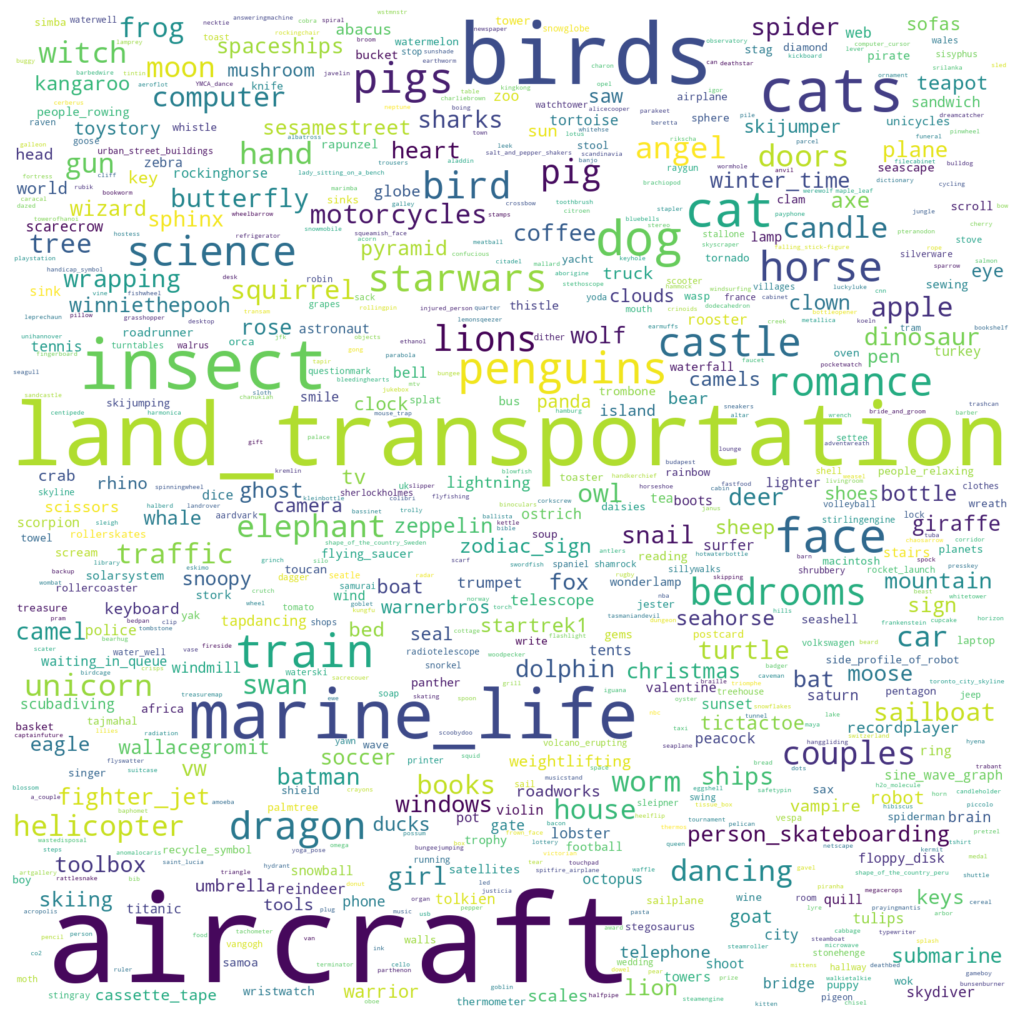

In [ ]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming class_counts is already populated with the word frequencies

# Modify the WordCloud parameters to reduce empty space
wordcloud = WordCloud(
    max_words=1000,  # Increase the number of words
    width=1600,
    height=1600,
    background_color='white',
    min_font_size=1,
    contour_width=1,  # Add a contour to give words some definition
    contour_color='black',
    prefer_horizontal=1.0,  # Prioritize horizontal words to reduce gaps
    colormap='viridis'  # Use a different colormap for visual variety
).generate_from_frequencies(class_counts)

# Plot the WordCloud image
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()


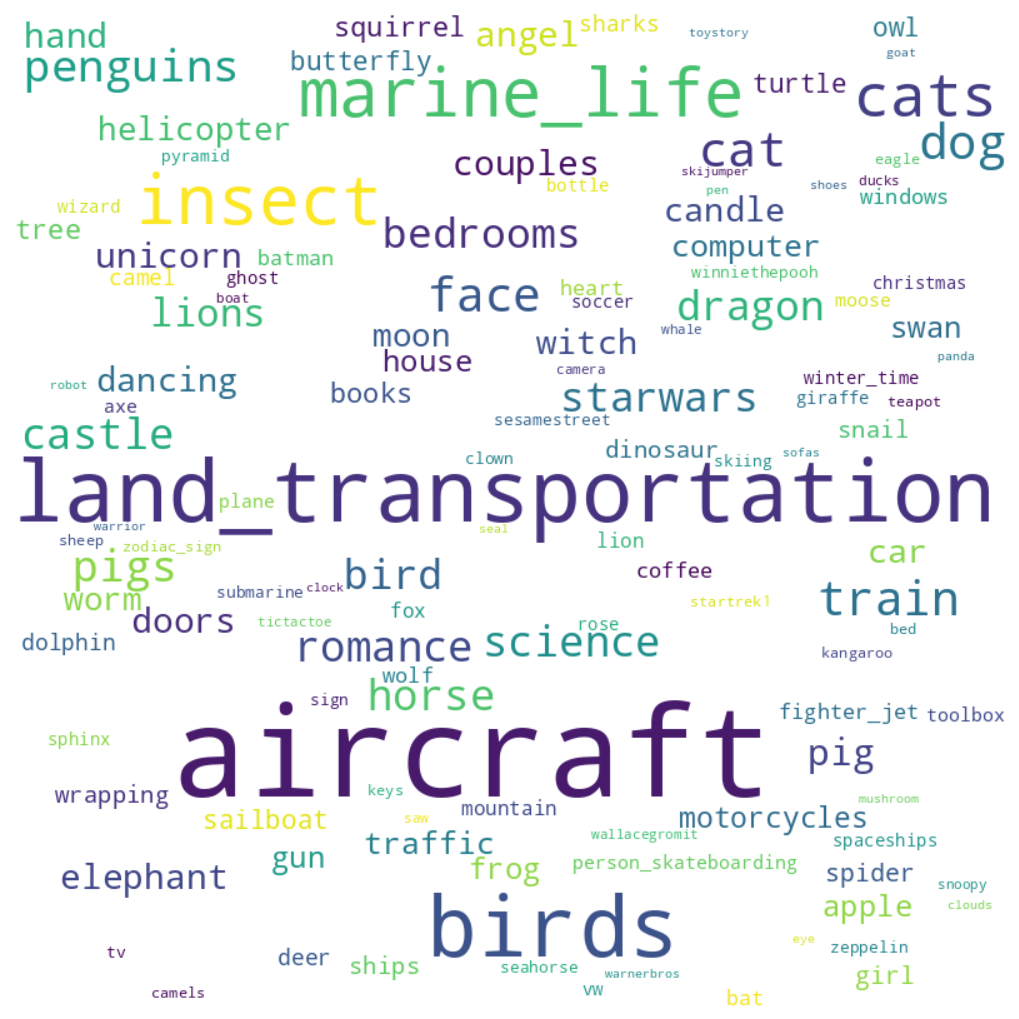

In [ ]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming class_counts is already populated with the word frequencies

# Modify the WordCloud parameters to balance the scaling
wordcloud = WordCloud(
    max_words=1000,  # Increase the number of words
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,  # Set a higher minimum font size for better visibility
    max_font_size=100,  # Set a max font size to limit dominance of larger words
    relative_scaling=0.5,  # Lower this value to reduce the size difference between words
    contour_width=1,
    contour_color='black',
    prefer_horizontal=1.0,
    colormap='viridis'
).generate_from_frequencies(class_counts)

# Plot the WordCloud image
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()


In [ ]:
results = process_ascii_art('path_to_your_json_file.jsonl')


Class name image generator (for joshua)


Saving cleaned_filtered_metadata_v2_filtered (2).jsonl to cleaned_filtered_metadata_v2_filtered (2) (6).jsonl


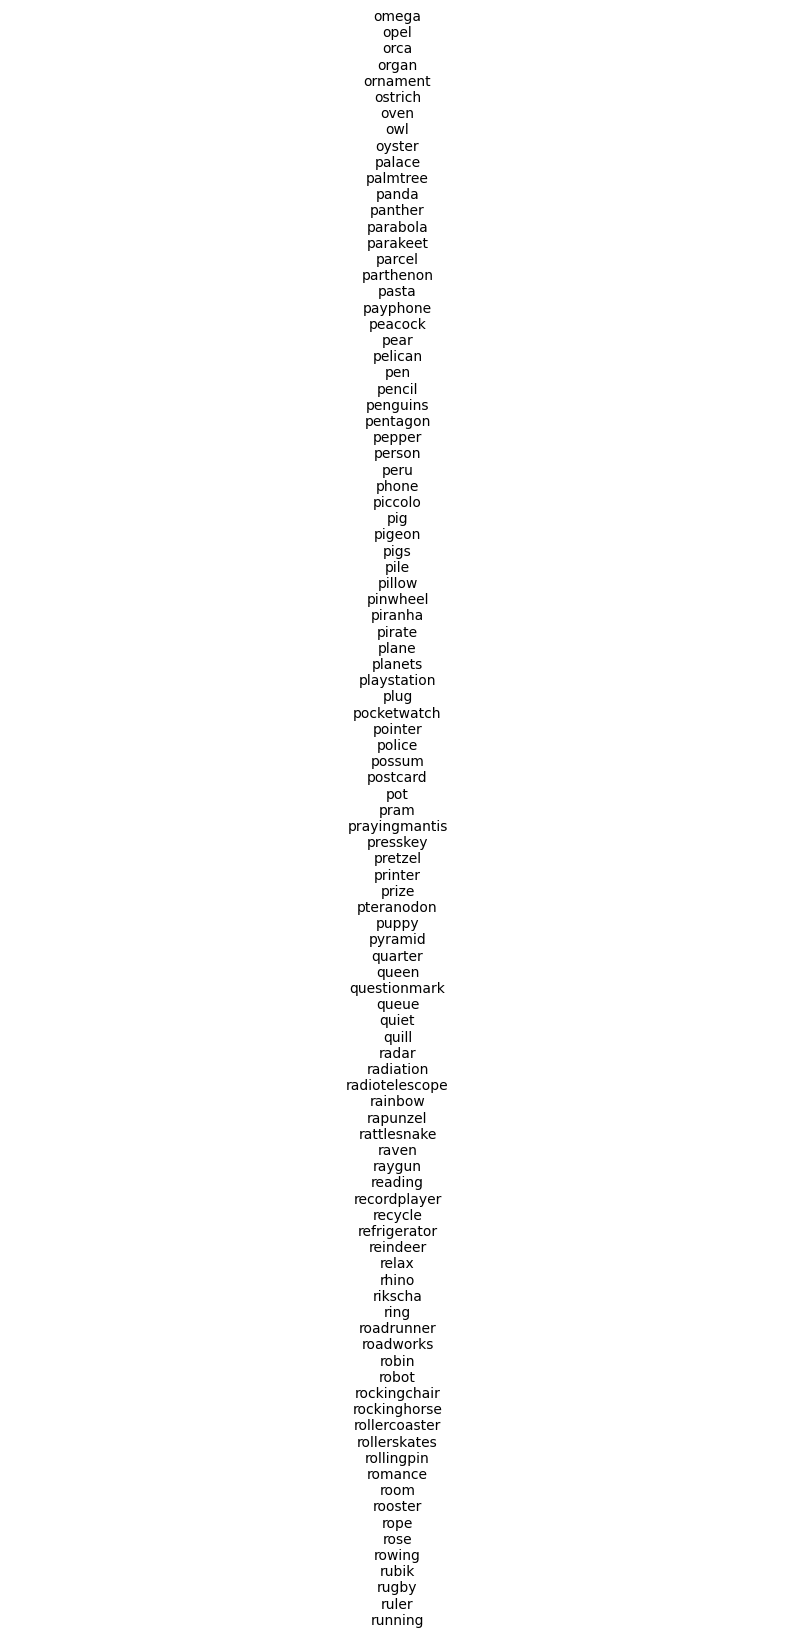

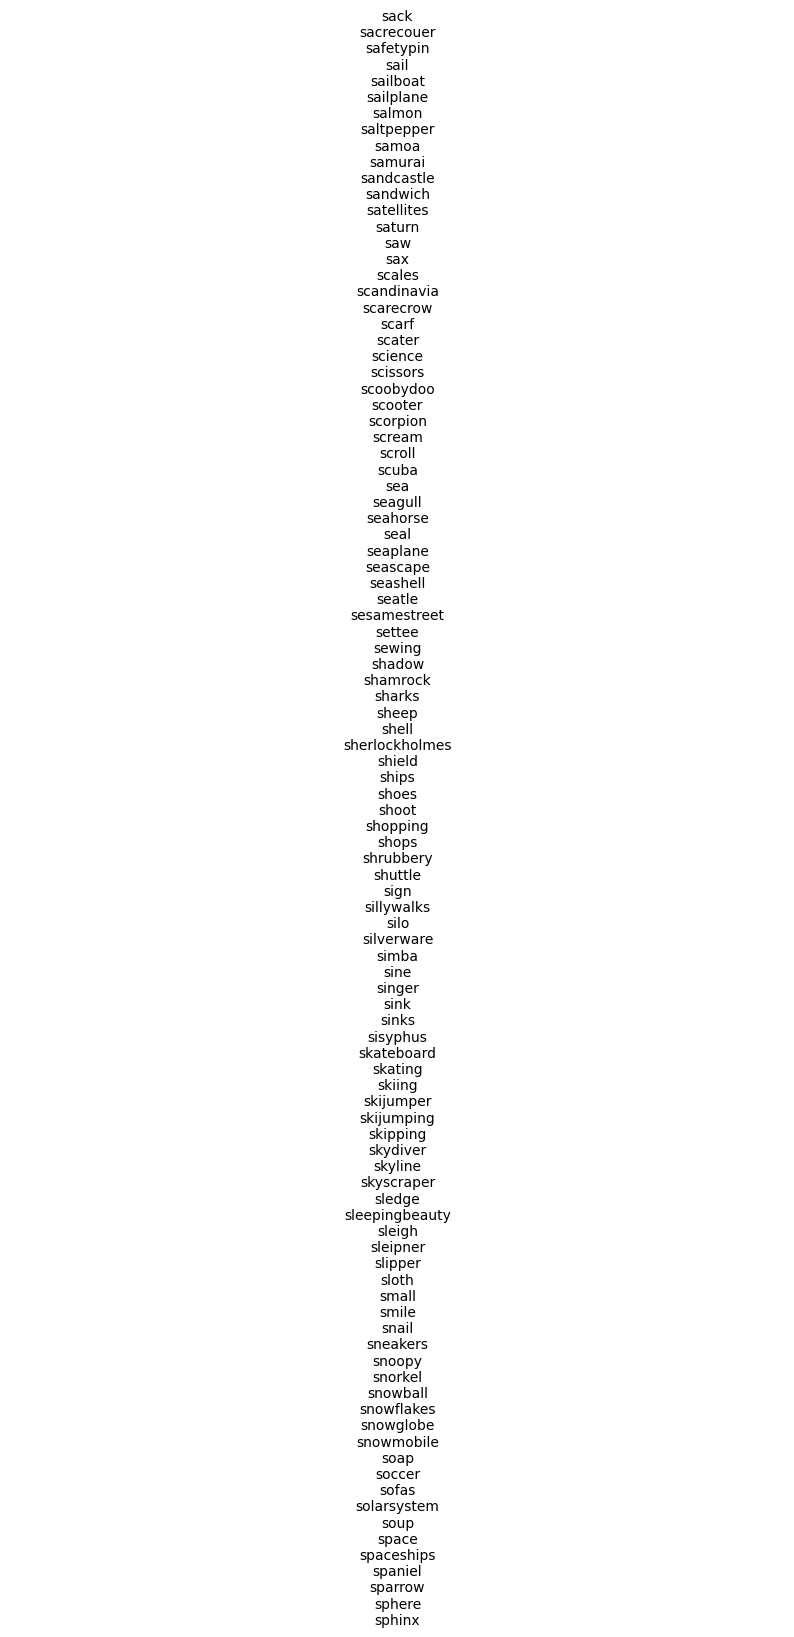

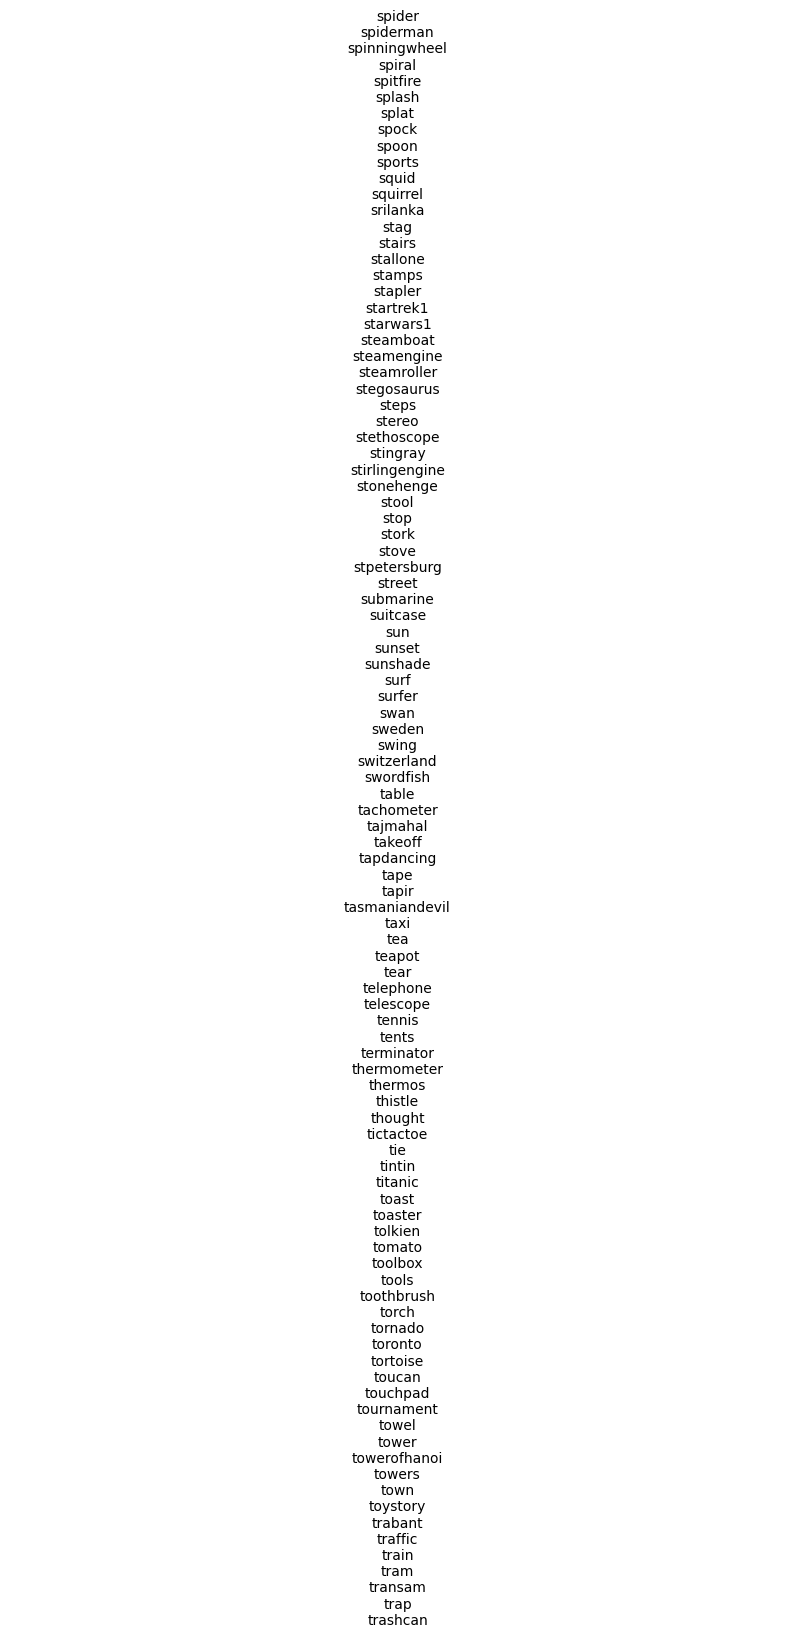

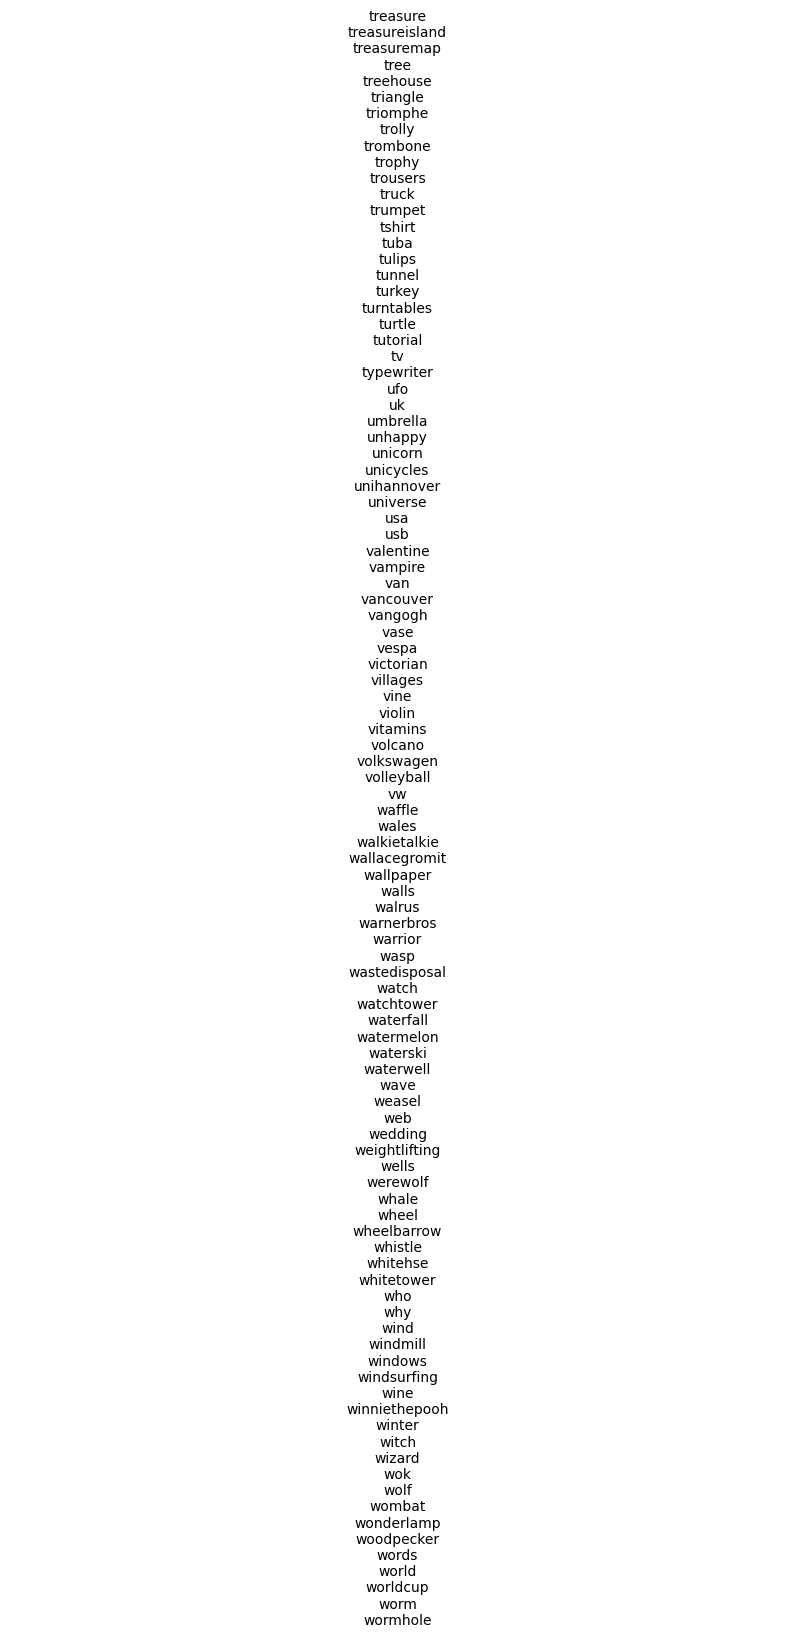

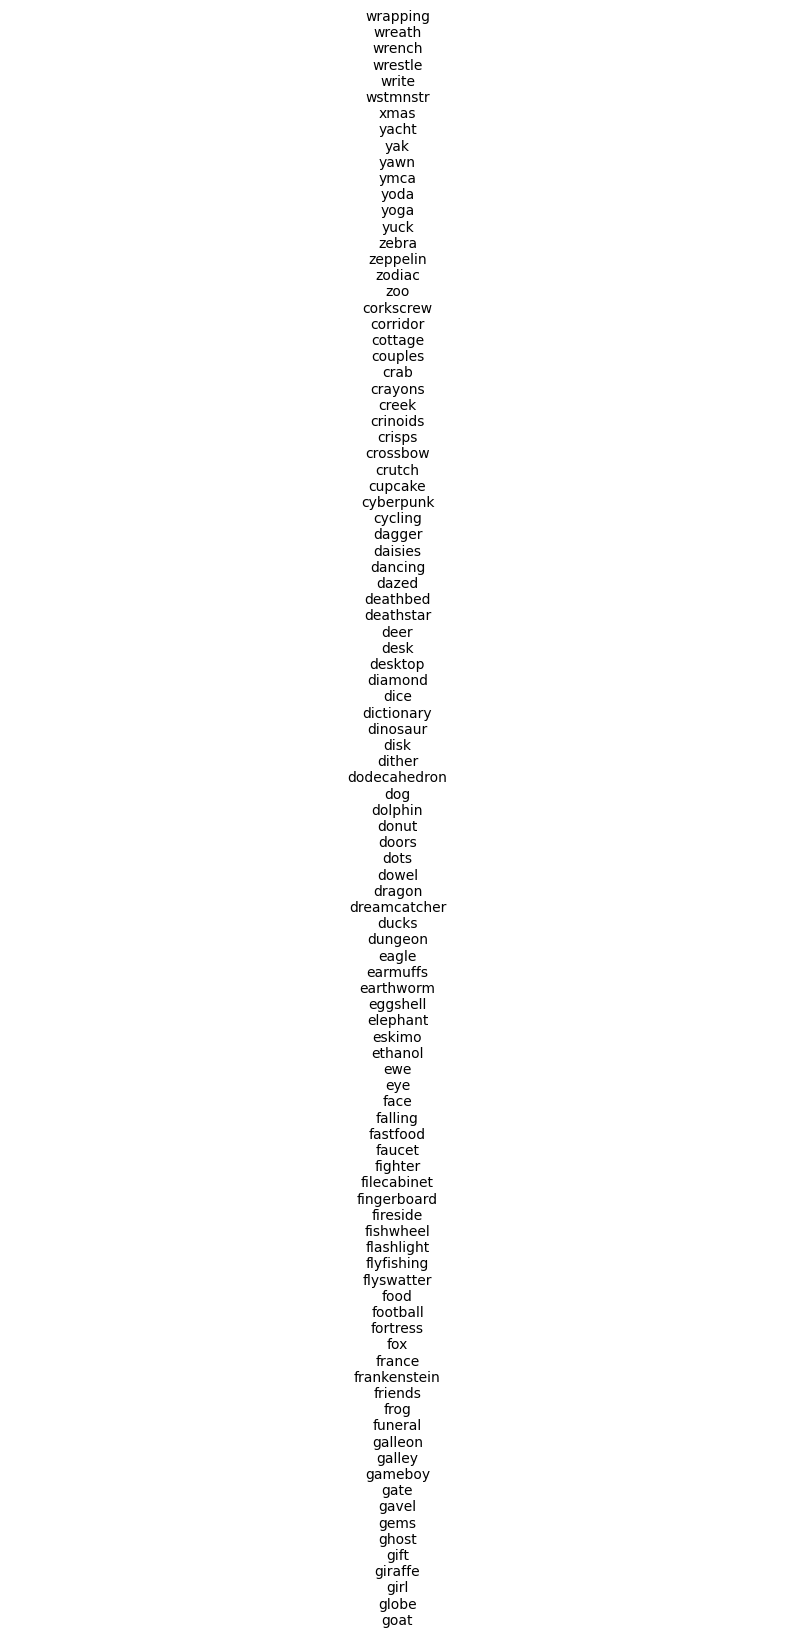

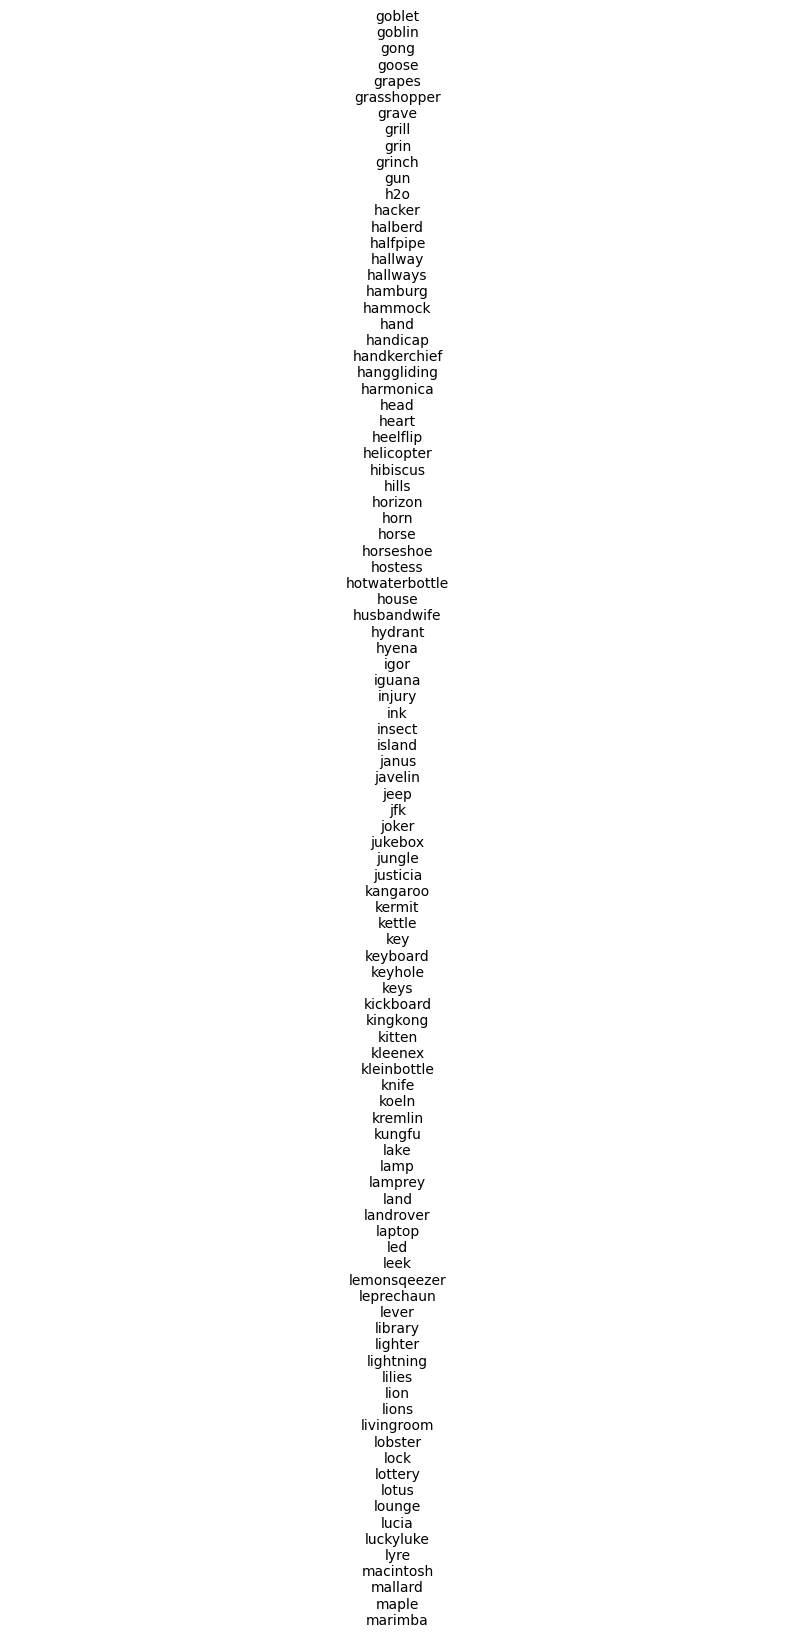

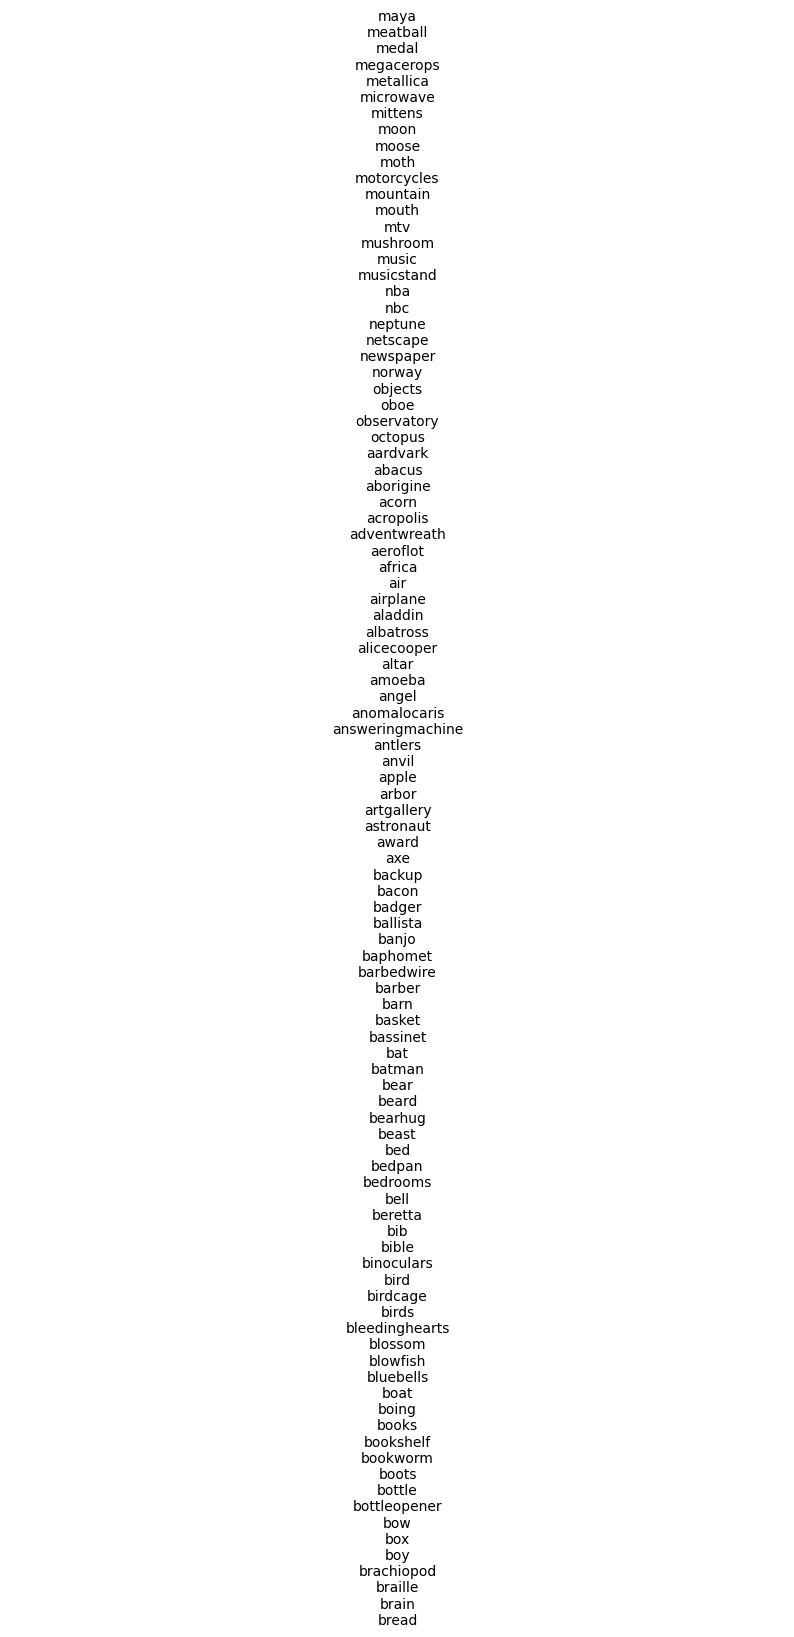

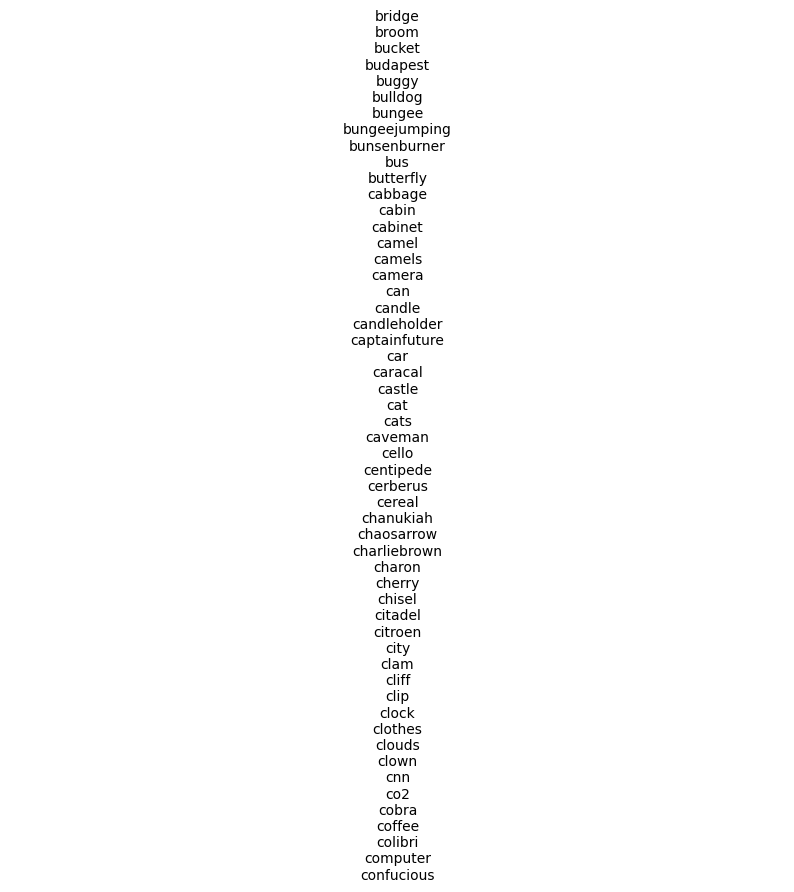

In [ ]:
# Step 1: Upload the JSONL file
from google.colab import files
import json
import matplotlib.pyplot as plt
import math

# Upload the file
uploaded = files.upload()

# Extract the filename from the uploaded file
filename = list(uploaded.keys())[0]

# Step 2: Read the JSONL file and extract unique 'class' values
unique_class_names = []
seen_classes = set()  # Set to track seen class names

with open(filename, 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        class_name = json_obj.get('class', 'Unknown')

        # Only add unique class names
        if class_name not in seen_classes:
            unique_class_names.append(class_name)
            seen_classes.add(class_name)

# Step 3: Plot in batches of 100 unique class names
batch_size = 100
total_items = len(unique_class_names)
num_batches = math.ceil(total_items / batch_size)  # Calculate number of batches

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = min(start_idx + batch_size, total_items)  # Ensure no out-of-bound errors
    batch_class_names = unique_class_names[start_idx:end_idx]

    # Create a new figure for each batch
    plt.figure(figsize=(10, 10))

    # Plot the class names for the current batch
    plt.text(0.5, 0.5, "\n".join(batch_class_names), ha='center', va='center', wrap=True)
    plt.axis('off')  # Turn off the axis

    # Display the image for the current batch
    plt.show()
